In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error as mae, mean_absolute_percentage_error as mape, r2_score as r2
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.metrics import make_scorer
import re
import string
from nltk.corpus import stopwords
from pymystem3 import Mystem
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
warnings.filterwarnings("ignore")

In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
!python -m nltk.downloader all

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque

In [20]:
pip install optuna

In [21]:
import tensorflow as tf
import optuna

In [22]:

from tqdm.notebook import tqdm
tqdm.pandas()

In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
pip install catboost

In [ ]:
from catboost import *

In [ ]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/cleaned_data_final3.csv')

In [ ]:
df = df[['mean_salary_all', 'prof_name', 'name','schedule', 'experience_rus','employment', 'city', 'key_skills', 'description']]

In [ ]:
class PreprocessData:
    def __init__ (self, data, y, stem_method=Mystem()):
        """Clean data and preprocess text"""
        self.data = data
        self.y = y
        self.mystem = stem_method
        # self.show_stats = show_stats

    def fill_nans(self):
        self.data[y] = self.data[y].fillna(0)
        for col in self.data.select_dtypes(['object']).columns:
            self.data[col] = self.data[col].fillna('')

    def drop_duplicates(self):
        self.data = self.data.drop_duplicates(subset=['description'])

    def clean_and_lemmatize(self, text):
        # clean punctuation and stop words
        text = text.lower()
        words = re.findall(r'\b\w+\b', text)
        stop_words = set(stopwords.words('russian'))
        words = [w for w in words if w not in stop_words]
        # clean_text = ' '.join(words)

        # lemmatize
        # words = text.split()
        lemmas = [self.mystem.lemmatize(word)[0] for word in words]
        lemmatized_text = ' '.join(lemmas)
        return lemmatized_text

    def get_cleaned_data(self):
        self.drop_duplicates()
        self.fill_nans()
        self.data['descr_clean'] = self.data['description'].progress_apply(self.clean_and_lemmatize)
        return self.data.reset_index(drop=True)

    def get_stats(self, cat_features):
        print(self.data.info(), '\n')
        print("Numerical features' analysis")
        plt.figure()
        self.data[self.y].hist(bins=30)
        plt.title(f'{self.y} distribution')
        plt.show;
        display(self.data.describe().T)

        print('\n', "Categorical features' analysis")
        display(self.data.describe(include=object).T)
        for col in cat_features:
            plt.figure()
            self.data[col].value_counts().head(10).plot(kind='barh', color='pink')
            plt.title(f'{col} frequency')
            plt.show();

In [ ]:
y = 'mean_salary_all'
cat_features = ['prof_name', 'city', 'schedule', 'employment', 'experience_rus']
text_features = ['key_skills', 'descr_clean', 'name']

In [ ]:
data_processed = PreprocessData(df, y)
df = data_processed.get_cleaned_data()

In [ ]:
df['key_skills'] = df['key_skills'].str.lower()
df['name'] = df['name'].str.lower()

**Baseline (predicting with mean and median value)**

In [18]:
mean_value = df['mean_salary_all'].mean()
median_value = df['mean_salary_all'].median()
print('Mean value:', round(mean_value, 2))
print('Median value:', median_value)

Mean value: 101851.68
Median value: 85000.0


In [19]:
mean_value_array = [mean_value] * len(df)
median_value_array = [median_value] * len(df)

In [20]:
print('MAE with mean salary', round(mae(mean_value_array, df['mean_salary_all']), 2))
print('MAE with median salary', round(mae(median_value_array, df['mean_salary_all']), 2))

MAE with mean salary 49560.26
MAE with median salary 47684.21


**Linear regression**

In [21]:
tfidf = TfidfVectorizer(max_features=5000)

In [22]:
cat_features_new =  ['schedule', 'employment', 'experience_rus']

In [23]:
one_hot_encoded1 = pd.get_dummies(df['schedule'])
one_hot_encoded2 = pd.get_dummies(df['employment'])
one_hot_encoded3 = pd.get_dummies(df['experience_rus'])

m = pd.concat([one_hot_encoded1, one_hot_encoded2, one_hot_encoded3], axis=1)



In [ ]:
# df_new = pd.DataFrame()
# for col in cat_features_new:
#     dummies = pd.get_dummies(df[col], prefix=col)
#     df_new = pd.concat([df, dummies, df_new], axis=1)

# # df.drop(columns_list, axis=1, inplace=True)


In [ ]:
# df_new = df_new.drop(cat_features_new + text_features + ['prof_name', 'city', 'mean_salary_all', 'description'], axis =1 )
# df_new.info()

In [24]:
stop_words = set(stopwords.words('russian'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token.lower() not in stop_words]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    tokens = [token for token in tokens if token.isalnum()]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

df['key_skills'] = df['key_skills'].apply(preprocess_text)
df['name'] = df['name'].apply(preprocess_text)
df['descr_clean'] = df['descr_clean'].apply(preprocess_text)


In [25]:
X_text_name =  tfidf.fit_transform(df['name'])
X_text_skill =  tfidf.fit_transform(df['key_skills'])
X_text_descr =  tfidf.fit_transform(df['descr_clean'])


In [26]:
X = pd.concat([pd.DataFrame(pd.DataFrame(X_text_name.toarray()).mean(axis=1)), pd.DataFrame(pd.DataFrame(X_text_skill.toarray().mean(axis=1))), pd.DataFrame(pd.DataFrame(X_text_descr.toarray().mean(axis=1))), pd.DataFrame(m)], axis=1)

In [27]:
for col in X.columns:
    if str(col).isdigit():
        X = X.rename(columns={col: f'col_{col}'})

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X.reset_index().drop(columns ='index'), df[y], test_size=0.2, random_state=123)

In [29]:
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = model_linear.predict(X_test)

MAE_linreg = mae(y_pred, y_test)
r2_linreg = r2(y_test, y_pred)

results = pd.DataFrame({
    'Model': ['Linear Regression'],
    'MAE': [round(MAE_linreg, 2)],
    'R2': [round(r2_linreg, 2)]
})

styled_results = results.style.set_table_styles([{
    'selector': 'th',
    'props': [
        ('border', '1px solid black'),
        ('background-color', 'lightgrey'),
        ('color', 'black'),
        ('text-align', 'center')
    ]
}, {
    'selector': 'td',
    'props': [
        ('border', '1px solid black'),
        ('text-align', 'center'),
        ('background-color', 'white'),
        ('color', 'black')

    ]
}])

display(styled_results)



,Model,MAE,R2
0,Linear Regression,38688.600000,0.340000


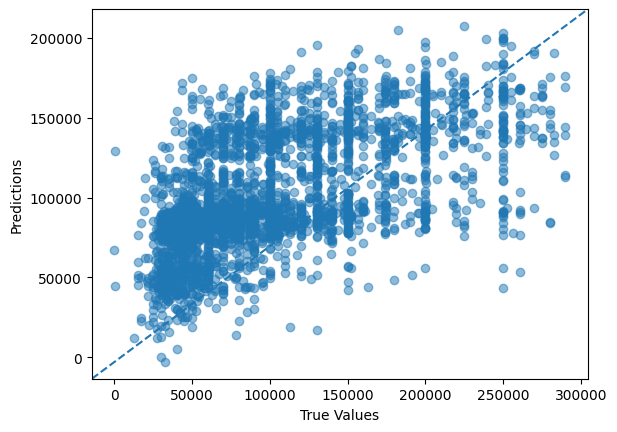

In [31]:
plt.scatter(y_test, model_linear.predict(X_test), alpha=0.5)
plt.plot([0, 1], [0, 1], '--', transform=plt.gca().transAxes)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

**Lasso regression**

In [32]:
from sklearn import linear_model

In [33]:
clf = linear_model.Lasso()
clf.fit(X_train, y_train)

Lasso()

In [34]:
y_pred = clf.predict(X_test)

MAE_ridge = mae(y_pred, y_test)
r2_ridge = r2(y_test, y_pred)
print('MAE with Ridge', round(MAE_ridge, 2))
print('R2 with Ridge', round(r2_ridge, 2))

MAE with Ridge 38772.98
R2 with Ridge 0.33


**Random Forest + TF-IDF**

In [35]:
df = pd.read_csv('/content/drive/MyDrive/cleaned_data_final3.csv')
df = df[['mean_salary_all', 'prof_name', 'name','schedule', 'experience_rus','employment', 'city', 'key_skills', 'description']]
df = data_processed.get_cleaned_data()
df['key_skills'] = df['key_skills'].str.lower()
df['name'] = df['name'].str.lower()

  0%|          | 0/14516 [00:00<?, ?it/s]

In [36]:
encoder = LabelEncoder()

def label_encoder_for_columns(df, columns):

  for col in columns:
    df[col] = encoder.fit_transform(df[col])

  return df
X_cat = label_encoder_for_columns(df, cat_features)[cat_features]

In [37]:
X = pd.concat([pd.DataFrame(pd.DataFrame(X_text_name.toarray()).mean(axis=1)), pd.DataFrame(pd.DataFrame(X_text_skill.toarray().mean(axis=1))), pd.DataFrame(pd.DataFrame(X_text_descr.toarray().mean(axis=1))), pd.DataFrame(X_cat)], axis=1)


In [38]:
for col in X.columns:
    if str(col).isdigit():
        X = X.rename(columns={col: f'col_{col}'})
X_train, X_test, y_train, y_test = train_test_split(X.reset_index().drop(columns ='index'), df[y], test_size=0.2, random_state=123)

In [39]:
def parameters(prm):
  params = {
         'n_estimators': prm.suggest_int('n_estimators', 100, 200, 50),
         'max_depth': prm.suggest_int('max_depth', 5, 15, 5),
         }

  model_RF = RandomForestRegressor(**params, random_state=123)
  model_RF.fit(X_train, y_train)
  score = model_RF.score(X_test, y_test)

  return score

In [40]:
study = optuna.create_study(direction='maximize')
study.optimize(parameters, n_trials=10, timeout=60)

best_params = study.best_params
best_model_RF = RandomForestRegressor(**best_params, random_state=123)

[I 2024-01-31 20:15:07,432] A new study created in memory with name: no-name-0d0fda95-64cc-4b1e-9384-02afb0b60ec6
[I 2024-01-31 20:15:10,662] Trial 0 finished with value: 0.4415280610474991 and parameters: {'n_estimators': 200, 'max_depth': 5}. Best is trial 0 with value: 0.4415280610474991.
[I 2024-01-31 20:15:13,802] Trial 1 finished with value: 0.5250090760271581 and parameters: {'n_estimators': 100, 'max_depth': 10}. Best is trial 1 with value: 0.5250090760271581.
[I 2024-01-31 20:15:17,576] Trial 2 finished with value: 0.5250090760271581 and parameters: {'n_estimators': 100, 'max_depth': 10}. Best is trial 1 with value: 0.5250090760271581.
[I 2024-01-31 20:15:25,235] Trial 3 finished with value: 0.5286381734303963 and parameters: {'n_estimators': 200, 'max_depth': 15}. Best is trial 3 with value: 0.5286381734303963.
[I 2024-01-31 20:15:32,330] Trial 4 finished with value: 0.5285786379928505 and parameters: {'n_estimators': 150, 'max_depth': 15}. Best is trial 3 with value: 0.52863

In [41]:
best_model_RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, n_estimators=200, random_state=123)

In [43]:
y_pred = best_model_RF.predict(X_test)

MAE_RF= mae(y_pred, y_test)
r2_RF = r2(y_test, y_pred)
print('MAE with Random Forest', round(MAE_RF, 2))
print('R2 with Random Forest', round(r2_RF, 2))

MAE with Random Forest 31307.22
R2 with Random Forest 0.53


In [44]:
y_pred = best_model_RF.predict(X_test)

MAE_RF= mae(y_pred, y_test)
r2_RF = r2(y_test, y_pred)

results = pd.DataFrame({
    'Model': ['Random Forest'],
    'MAE': [round(MAE_RF, 2)],
    'R2': [round(r2_RF, 2)]
})

styled_results = results.style.set_table_styles([{
    'selector': 'th',
    'props': [
        ('border', '1px solid black'),
        ('background-color', 'lightgrey'),
        ('color', 'black'),
        ('text-align', 'center')
    ]
}, {
    'selector': 'td',
    'props': [
        ('border', '1px solid black'),
        ('text-align', 'center'),
        ('background-color', 'white'),
        ('color', 'black')

    ]
}])

display(styled_results)



,Model,MAE,R2
0,Random Forest,31307.220000,0.530000


**Catboost with categorical features (professional role, city, schedule, employment, experience) and text features (description, job title, key skills)**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/cleaned_data_final3.csv')
df = df[['mean_salary_all', 'prof_name', 'name','schedule', 'experience_rus','employment', 'city', 'key_skills', 'description']]
df = data_processed.get_cleaned_data()
df['key_skills'] = df['key_skills'].str.lower()
df['name'] = df['name'].str.lower()

  0%|          | 0/14516 [00:00<?, ?it/s]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df[cat_features + text_features], df[y], test_size=0.2, random_state=123)

In [47]:
def parameters(prm):
  params = {
         'n_estimators': prm.suggest_int('n_estimators', 100, 200, 50),
         'max_depth': prm.suggest_int('max_depth', 5, 15, 5),
         }

  model = CatBoostRegressor(**params, random_state=123, task_type='GPU')
  model.fit(X_train, y_train, cat_features=cat_features, text_features=['key_skills', 'descr_clean', 'name'], verbose=100)
  score = model.score(X_test, y_test)

  return score

In [48]:
study = optuna.create_study(direction='maximize')
study.optimize(parameters, n_trials=5, timeout=60)

best_params = study.best_params
best_model = CatBoostRegressor(**best_params, random_state=123, task_type='GPU')

[I 2024-01-31 20:16:31,713] A new study created in memory with name: no-name-23425a0a-e44d-4248-aca9-a62e635e4fcc


Learning rate set to 0.220199
0:	learn: 55395.8296109	total: 793ms	remaining: 1m 18s
99:	learn: 13782.2574892	total: 53.5s	remaining: 0us


[I 2024-01-31 20:17:33,041] Trial 0 finished with value: 0.6203034328465427 and parameters: {'n_estimators': 100, 'max_depth': 15}. Best is trial 0 with value: 0.6203034328465427.


In [49]:
best_model.fit(X_train, y_train, cat_features=cat_features, text_features=['key_skills', 'descr_clean', 'name'], verbose=100, eval_set=(X_test, y_test))


Learning rate set to 0.155999
0:	learn: 56975.7680544	test: 58219.3279330	best: 58219.3279330 (0)	total: 667ms	remaining: 1m 6s
99:	learn: 16446.8144830	test: 37959.3901166	best: 37959.3901166 (99)	total: 55.2s	remaining: 0us
bestTest = 37959.39012
bestIteration = 99


In [50]:
y_pred = best_model.predict(X_test)

MAE_catboost = mae(y_pred, y_test)
r2_catboost = r2(y_test, y_pred)

In [51]:
y_pred = best_model.predict(X_test)


results = pd.DataFrame({
    'Model': ['Catboost'],
    'MAE': [round(MAE_catboost, 2)],
    'R2': [round(r2_catboost, 2)]
})

styled_results = results.style.set_table_styles([{
    'selector': 'th',
    'props': [
        ('border', '1px solid black'),
        ('background-color', 'lightgrey'),
        ('color', 'black'),
        ('text-align', 'center')
    ]
}, {
    'selector': 'td',
    'props': [
        ('border', '1px solid black'),
        ('text-align', 'center'),
        ('background-color', 'white'),
        ('color', 'black')

    ]
}])

display(styled_results)



,Model,MAE,R2
0,Catboost,27647.600000,0.620000


In [ ]:
best_model.save_model("catboost_model.cbm")

**BERT + Catboost**

In [52]:
from transformers import BertTokenizer, TFBertModel, BertModel,TFAutoModel, AutoTokenizer

In [53]:
tokenizer = AutoTokenizer.from_pretrained('cointegrated/rubert-tiny2')
bert_model = BertModel.from_pretrained('cointegrated/rubert-tiny2')

tokenizer_config.json:   0%|          | 0.00/401 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.74M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/693 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/118M [00:00<?, ?B/s]

In [54]:
pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16506 sha256=4358baa351870a19d241949a46574fa771a43bf210b9913ccbe8a7574df30394
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [55]:
import torch
import swifter

In [56]:
df['total'] = df['name'] + ' ' + df['descr_clean'] + ' ' + df['key_skills']

In [57]:
def getEmbedding(text):

    encoded_input = tokenizer(text, return_tensors='pt', truncation=True,
                                          max_length=512, add_special_tokens=True)

    with torch.no_grad():

        output = bert_model(**encoded_input)
        output = output[1].detach().cpu().numpy()[0]
        torch.cuda.empty_cache()

    return output


In [58]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [59]:
df['Embedding'] = df['total'].swifter.apply(lambda x: getEmbedding(x))

Pandas Apply:   0%|          | 0/14516 [00:00<?, ?it/s]

In [67]:
a = df['Embedding'].apply(pd.Series).reset_index().drop(columns='index').mean(axis=1)

In [81]:
X = pd.concat([df['Embedding'].apply(pd.Series).reset_index().drop(columns='index'), df[cat_features].reset_index().drop(columns='index')], axis = 1)

In [68]:
X = pd.concat([a, df[cat_features].reset_index().drop(columns='index')], axis = 1)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, df[y], test_size=0.2, random_state=123)

In [85]:
def parameters(prm):
  params = {
         'n_estimators': prm.suggest_int('n_estimators', 50, 250, 50),
         'max_depth': prm.suggest_int('max_depth', 5, 15, 5),
         }

  model = CatBoostRegressor(**params, random_state=123, task_type='GPU')
  model.fit(X_train, y_train, cat_features = cat_features, verbose=100)
  score = model.score(X_test, y_test)

  return score

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(parameters, n_trials=7, timeout=60)

best_params = study.best_params
best_model_catboost_bert = CatBoostRegressor(**best_params, random_state=123, task_type='GPU')

[I 2024-01-31 20:55:13,620] A new study created in memory with name: no-name-48e00216-aaca-487e-907e-de246fe7f508


Learning rate set to 0.172858


In [65]:
best_model_catboost_bert.fit(X_train, y_train, cat_features = cat_features)

Learning rate set to 0.127422
0:	learn: 57329.3563311	total: 18ms	remaining: 4.48s
1:	learn: 54231.7645718	total: 37.3ms	remaining: 4.62s
2:	learn: 51648.9042534	total: 56ms	remaining: 4.61s
3:	learn: 49550.3089669	total: 74ms	remaining: 4.55s
4:	learn: 47878.0888327	total: 96.9ms	remaining: 4.75s
5:	learn: 46466.7674697	total: 114ms	remaining: 4.62s
6:	learn: 45428.0699714	total: 139ms	remaining: 4.84s
7:	learn: 44480.5196043	total: 158ms	remaining: 4.78s
8:	learn: 43710.2817376	total: 178ms	remaining: 4.77s
9:	learn: 42934.3741957	total: 198ms	remaining: 4.76s
10:	learn: 42375.3014451	total: 217ms	remaining: 4.71s
11:	learn: 41891.4676255	total: 235ms	remaining: 4.66s
12:	learn: 41420.3231789	total: 252ms	remaining: 4.6s
13:	learn: 40990.5930531	total: 272ms	remaining: 4.58s
14:	learn: 40723.1989247	total: 293ms	remaining: 4.6s
15:	learn: 40478.3453409	total: 308ms	remaining: 4.5s
16:	learn: 40223.4131899	total: 325ms	remaining: 4.45s
17:	learn: 39968.6737392	total: 347ms	remaining: 

In [66]:
y_pred = best_model_catboost_bert.predict(X_test)

MAE_catboost_bert = mae(y_pred, y_test)
r2_catboost_bert = r2(y_test, y_pred)
print('MAE with catboost', round(MAE_catboost_bert, 2))
print('R2 with catboost', round(r2_catboost_bert, 2))

MAE with catboost 28152.34
R2 with catboost 0.61
